In [5]:
%matplotlib inline
from mst import mst
from genie import gini, genie
import numpy as np
import matplotlib.pyplot as plt
import helpers
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import linkage, cut_tree

## Sprawdzenie poprawności funkcji gini

In [6]:
print(gini(np.array([1,1,1,1,1,1,1])))
print(gini(np.array([0,0,0,10**3, 10**3, 10**3])))
print(gini(np.array([10*10, 1, 1,1,1,1,1,1,1,1])))

0.0
0.6
0.908256880733945


# Zbiór wylosowany z rozkładu normalnego dwuywmiarowego
## Sprawdzenie poprawności funkcji mst

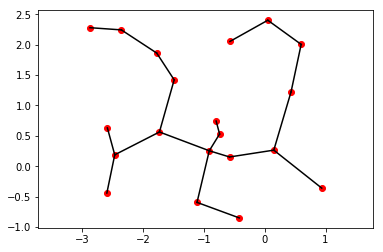

In [7]:
mst_test_data = np.random.multivariate_normal([-1, 1], np.array([[1,0],[0,1]]), 20)
mst_res = mst(mst_test_data)
plt.plot(mst_test_data[:,0],mst_test_data[:,1], 'ro')
helpers.connectpoints(mst_test_data[:,0],mst_test_data[:,1], mst_res[:,0], mst_res[:,1])
plt.axis('equal')
plt.show()

## Sprawdzenie zgodności genie dla g=1 z klastrowaniem single linkage

In [8]:
genie_1 =genie(mst_test_data, 1, 2)
single_linkage_1 = cut_tree(linkage(mst_test_data, 'single'), n_clusters=2).flatten()
print(np.array_equal(genie_1, single_linkage_1))

True


## Wynik algorytmu genie dla k = 3 i g = 0.4

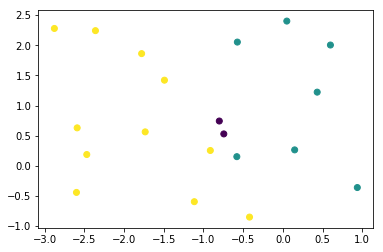

In [9]:
g_3_5 = genie(mst_test_data, 0.4, 3)
plt.scatter(mst_test_data[:,0], mst_test_data[:,1], c=g_3_5)

# Zbiór iris

In [10]:
iris = sns.load_dataset("iris")
iris = iris[['sepal_length', 'sepal_width']].drop_duplicates()

## Sprawdzenie poprawności funkcji mst

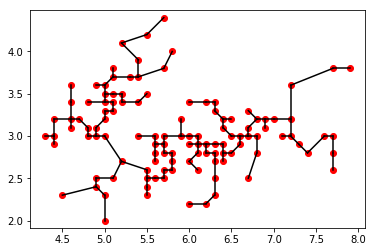

In [11]:
iris_data = iris.values
mst_iris = mst(iris_data)
plt.plot(iris_data[:,0],iris_data[:,1], 'ro')
helpers.connectpoints(iris_data[:,0],iris_data[:,1], mst_iris[:,0], mst_iris[:,1])
plt.axis('equal')
plt.show()

## Sprawdzenie zgodności genie dla g=1 z klastrowaniem single linkage

In [12]:
iris_3 =genie(iris_data, 1, 3)
single_linkage_3 = cut_tree(linkage(iris_data, 'single'), n_clusters=3).flatten()
print(np.array_equal(genie_1, single_linkage_1))

True


## Wynik algorytmu genie dla k = 4 i g = 0.3

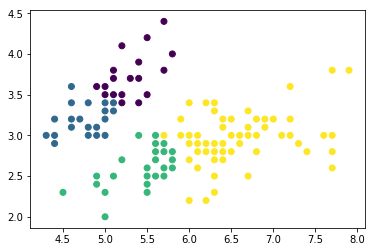

In [13]:
genie_iris = genie(iris_data, 0.3, 4)
plt.scatter(iris_data[:,0], iris_data[:,1], c=genie_iris)

# Zbiór wylosowany z rozkładów normalnych o różnych wartośćiach oczekiwanych

In [14]:
mu1 = np.repeat(np.random.normal(loc = 6, size=10, scale=2), 10)
mu2 = np.repeat(np.random.normal(loc = -6, size=10, scale=2), 10)
x1 = np.random.normal(loc=mu1, size=100, scale=3)
y1 = np.random.normal(loc=mu1, size=100,scale=3)
x2 = np.random.normal(loc=mu2, size=100,scale=3)
y2 = np.random.normal(loc=mu2, size=100,scale=3)
x = np.concatenate((x1,x2), axis=0)
y = np.concatenate((y1,y2), axis=0)
data_random = np.column_stack((x,y))

## Sprawdzenie poprawności funkcji mst

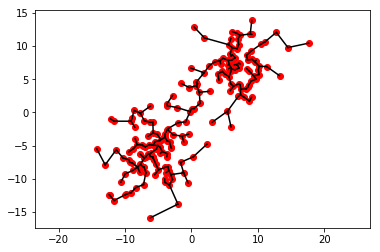

In [15]:
mst_random = mst(data_random)
plt.plot(data_random[:,0],data_random[:,1], 'ro')
helpers.connectpoints(data_random[:,0],data_random[:,1], mst_random[:,0], mst_random[:,1])
plt.axis('equal')
plt.show()

## Sprawdzenie zgodności genie dla g=1 z klastrowaniem single linkage

In [16]:
random_5 =genie(data_random, 1, 5)
single_linkage_5 = cut_tree(linkage(data_random, 'single'), n_clusters=5).flatten()
print(np.array_equal(random_5, single_linkage_5))

True


## Wynik algorytmu genie dla k = 6 i g = 0.1

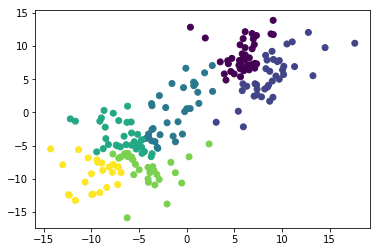

In [17]:
genie_random = genie(data_random, 0.1, 6)
plt.scatter(data_random[:,0], data_random[:,1], c=genie_random)